# Checking spin up of CCLM soil temperature 

In [1]:
import valenspy as vp
from valenspy.preprocessing_tasks.regrid import remap_cdo
from valenspy.preprocessing_tasks.select import select_point

from valenspy.diagnostic_visualizations import *
import matplotlib.pyplot as plt
import warnings
import xarray as xr
import numpy as np


# Turn off all warnings
warnings.filterwarnings('ignore')

### 0. Settings

In [2]:
# define machine name - used for paths of (observational) datasets
machine = 'hortense'

# reference dataset to compare to
model = 'CCLM'

# directory with experiments

experiments = ["EUR11_NU_TT_EC_TSO", "EUR11_NU_TT_EC_TSO_1994", "EUR11_NU_TT_EC_TSO_1993"]
experiment = experiments[0]

# do selection of individual points (do this in separate notebook.)
# Define the coordinates
d_point_coords = {
    'opwijk'    : (4.18, 50.97), 
    'betrix'    : (5.25, 49.854),
    'north_sea' : (2.465, 51.63),
    'channel'   : (-1.05, 50.14)
}
point_id = 'opwijk'
point_coord = d_point_coords[point_id]


# start up input manager
manager = vp.InputManager(machine=machine)


## 1. Loading and plotting

### 1.1 soil temperature

File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']


FileNotFoundError: No files found for dataset CCLM, variables ['tsl'], period None, frequency daily, region None and path_identifiers ['EUR11_NU_TT_EC_TSO_1994', 'daymean'].

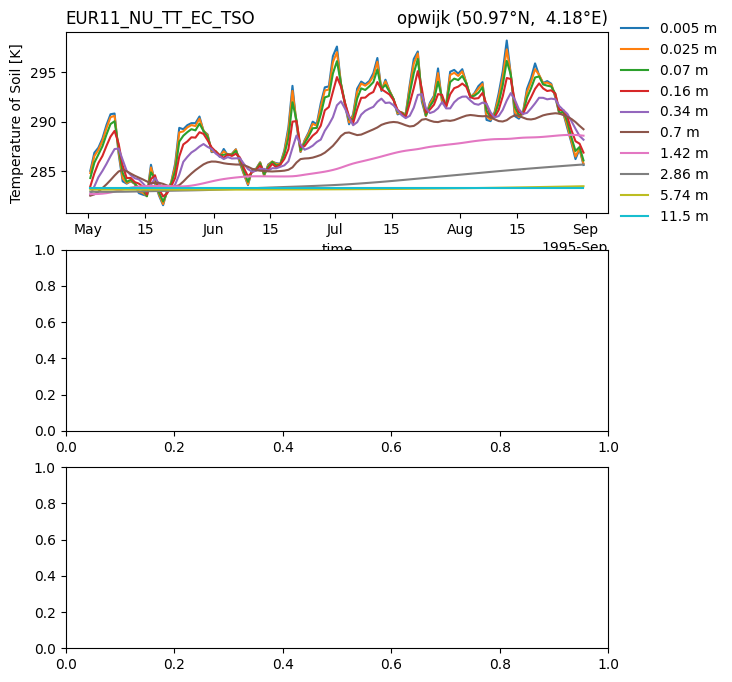

In [3]:
variable = 'tsl'

fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
        
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]

    for soil_level in da_mod_point.soil1: 

        da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')

fig.tight_layout()

### 1.1 soil moisture

In [ ]:
variable = 'mrsol'


fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
        
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]

    for soil_level in da_mod_point.soil1: 

        da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')
        

fig.tight_layout()

IndentationError: unexpected indent (4036950228.py, line 11)

### relative soil moisture (not the same as volumetric - for this the bulk density of CCLM is necessary!!)

File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/W_SO/daily/W_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['mrsol']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']


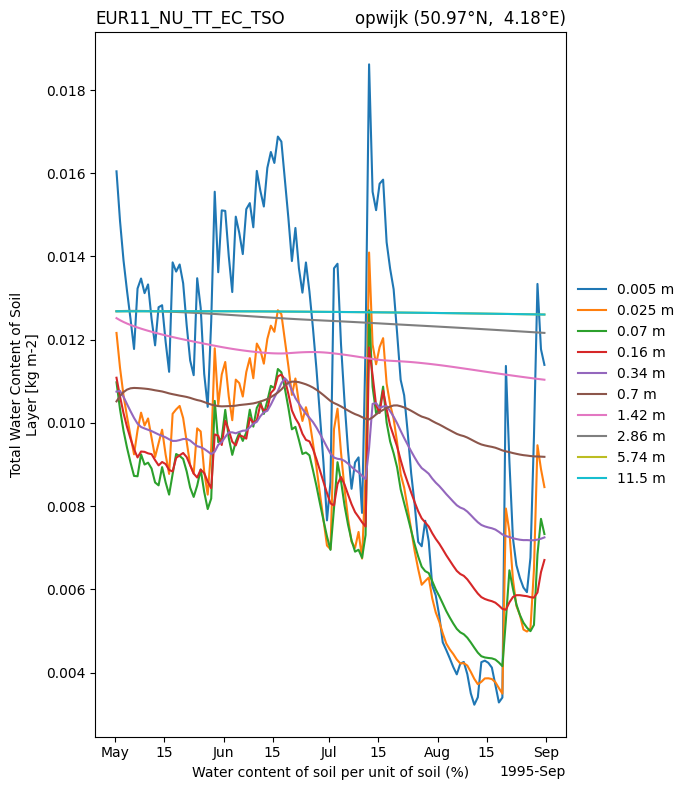

In [ ]:
variable = 'mrsol'


fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
        
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]
    soil_depth = np.insert(ds_mod_point.soil1.values,0,0)*1000 # in mm 
    soil_thickness = np.diff(soil_depth)
    da_mod_point_rel = da_mod_point / soil_thickness * 100
    
    for soil_level in da_mod_point.soil1: 

        da_mod_point_rel.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')
        ax.set_xlabel('Water content of soil per unit of soil (%)')

fig.tight_layout()